In [68]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install pmdarima


   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
    --------------------------------------- 10.2/625.1 kB ? eta -:--:--
   -- ------------------------------------ 41.0/625.1 kB 495.5 kB/s eta 0:00:02
   ---------- ----------------------------- 163.8/625.1 kB 1.4 MB/s eta 0:00:01
   -------------------- ------------------- 327.7/625.1 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  624.6/625.1 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.4/2.8 MB 8.3 MB/s eta 0:00:01
   -------- ------------------------------- 0.6/2.8 MB 7.3 MB/s eta 0:00:01
   ------------ --------------------------- 0.8/2.8 MB 6.7 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.8 MB 5.2 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.8 MB 5.3 MB/s eta 0:00:01
   ----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('daily_energy_consumption.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)
df

,Energy Consumption (kWh),Temperature High,Temperature Low,Total AC Usage Time (minutes)
Date,,,,
2023-09-01,6.000,29.264,18.538,0.0
2023-09-02,8.373,29.216,20.519,178.5
2023-09-03,7.493,29.850,20.472,112.0
2023-09-04,8.320,30.011,21.001,174.5
2023-09-05,8.707,29.588,19.086,203.0
...,...,...,...,...
2023-11-02,8.493,30.163,19.188,187.5
2023-11-03,6.000,29.286,20.117,0.0
2023-11-04,8.360,29.961,19.016,177.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67 entries, 2023-09-01 to 2023-11-06
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Energy Consumption (kWh)       67 non-null     float64
 1   Temperature High               67 non-null     float64
 2   Temperature Low                67 non-null     float64
 3   Total AC Usage Time (minutes)  67 non-null     float64
dtypes: float64(4)
memory usage: 2.6 KB


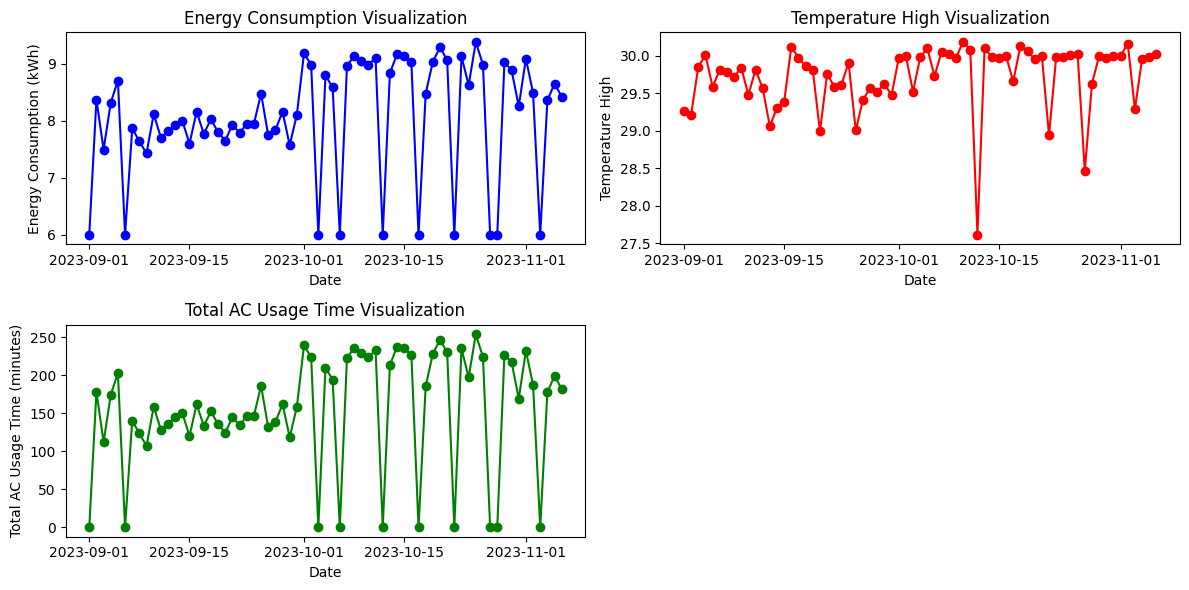

In [4]:
import matplotlib.pyplot as plt

# Membuat plot
plt.figure(figsize=(12, 6))

# Plot Energy Consumption
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Energy Consumption (kWh)'], marker='o', linestyle='-', color='b')
plt.title('Energy Consumption Visualization')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')

# Plot Temperature High
plt.subplot(2, 2, 2)
plt.plot(df.index, df['Temperature High'], marker='o', linestyle='-', color='r')
plt.title('Temperature High Visualization')
plt.xlabel('Date')
plt.ylabel('Temperature High')

# Plot Total AC Usage Time
plt.subplot(2, 2, 3)
plt.plot(df.index, df['Total AC Usage Time (minutes)'], marker='o', linestyle='-', color='g')
plt.title('Total AC Usage Time Visualization')
plt.xlabel('Date')
plt.ylabel('Total AC Usage Time (minutes)')

# Menyesuaikan tata letak supaya tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()


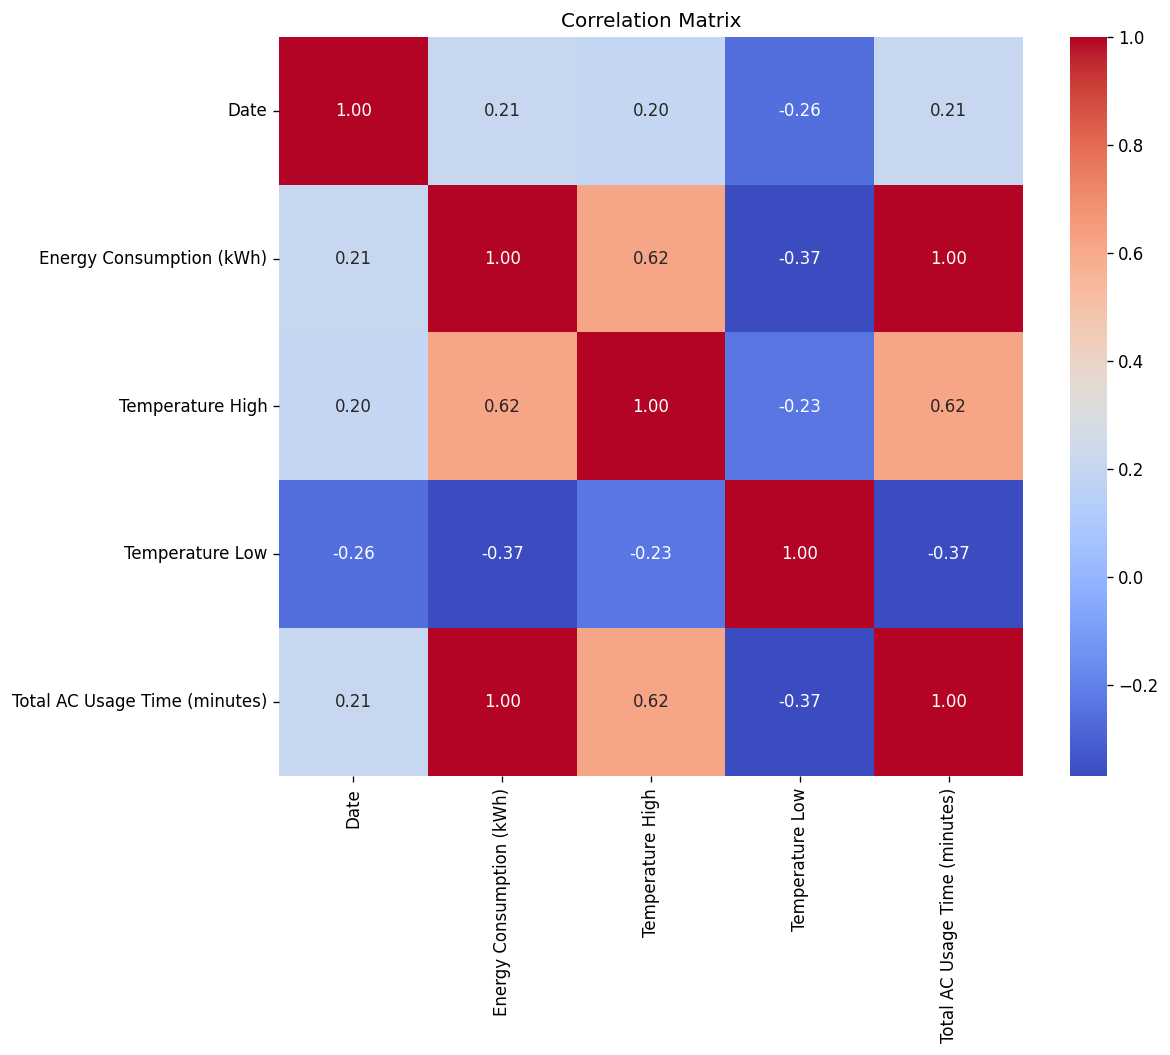

In [26]:
corr_matrix = df.corr()

# Plot correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Check stationarity
df = pd.read_csv('daily_energy_consumption.csv', parse_dates=['Date'])
result = adfuller(df['Energy Consumption (kWh)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
# If the p-value is greater than 0.05, apply differencing
if result[1] > 0.05:
    df_diff = df.diff().dropna()
    result_diff = adfuller(df_diff['Energy Consumption (kWh)'])
    print('ADF Statistic after differencing:', result_diff[0])
    print('p-value after differencing:', result_diff[1])

ADF Statistic: -2.022773645610213
p-value: 0.2766777739440053
ADF Statistic after differencing: -7.863573249923183
p-value after differencing: 5.206029813698957e-12


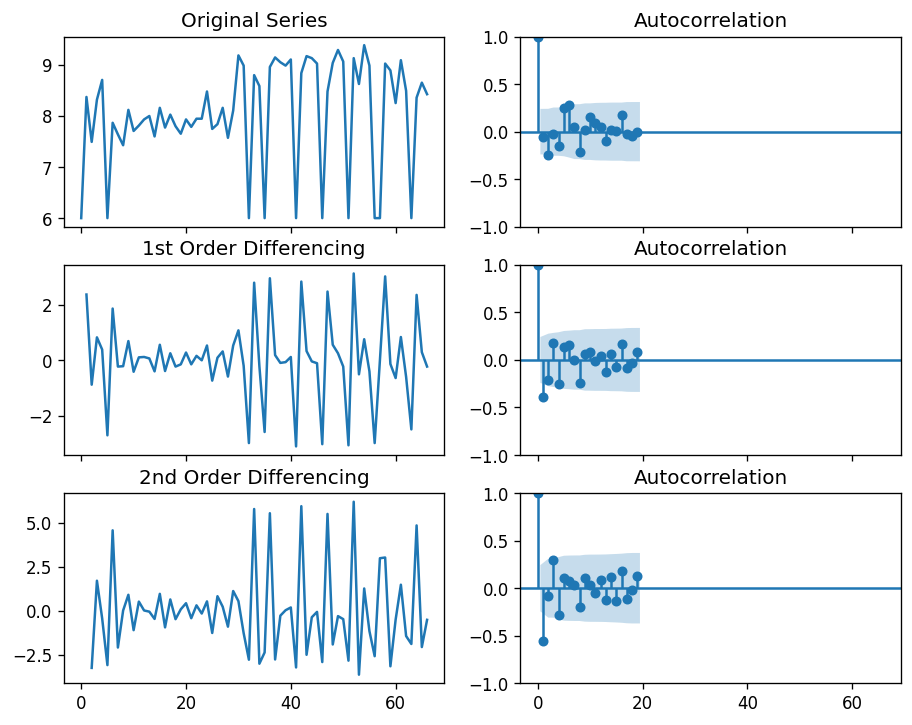

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Energy Consumption (kWh)']); axes[0, 0].set_title('Original Series')
plot_acf(df['Energy Consumption (kWh)'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Energy Consumption (kWh)'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Energy Consumption (kWh)'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Energy Consumption (kWh)'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Energy Consumption (kWh)'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

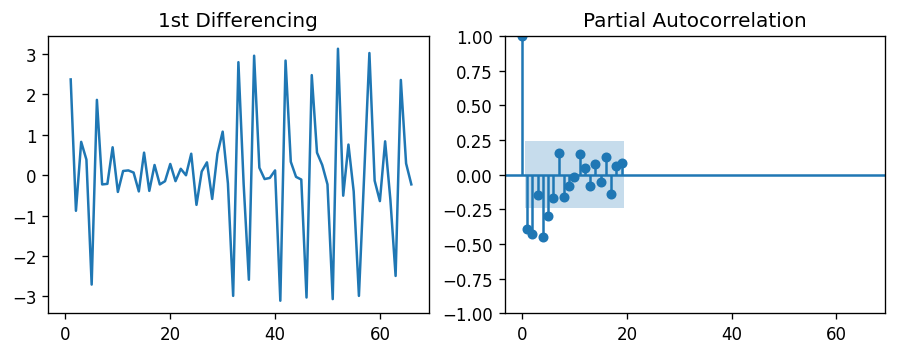

In [7]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['Energy Consumption (kWh)'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['Energy Consumption (kWh)'].diff().dropna(), ax=axes[1])

plt.show()

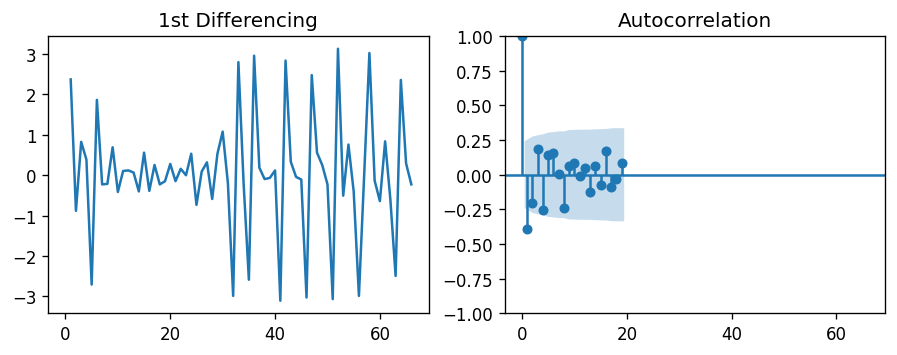

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['Energy Consumption (kWh)'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['Energy Consumption (kWh)'].diff().dropna(), ax=axes[1])

plt.show()

In [9]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

model = ARIMA(df['Energy Consumption (kWh)'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())


                                  SARIMAX Results                                   
Dep. Variable:     Energy Consumption (kWh)   No. Observations:                   67
Model:                       ARIMA(1, 1, 1)   Log Likelihood                 -96.489
Date:                      Tue, 19 Dec 2023   AIC                            198.977
Time:                              12:03:16   BIC                            205.546
Sample:                                   0   HQIC                           201.573
                                       - 67                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0733      0.133     -0.551      0.581      -0.334       0.187
ma.L1         -0.9463      0.060    -15.725      0.000      -1.064      -0.828
sigm

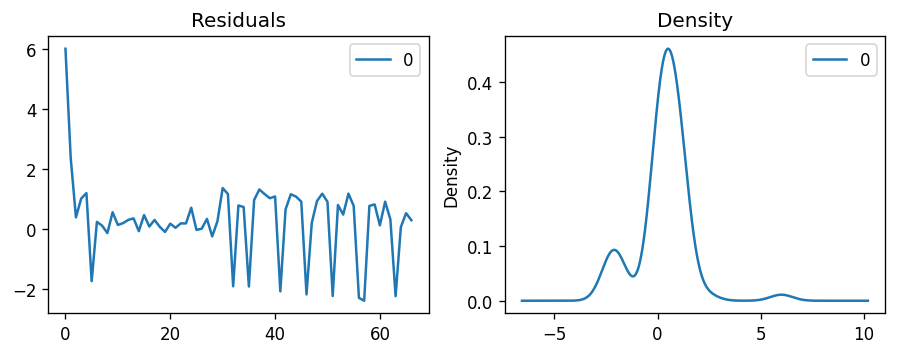

In [10]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [11]:
# Create Training and Test
train = df['Energy Consumption (kWh)'][:60]
test = df['Energy Consumption (kWh)'][60:]

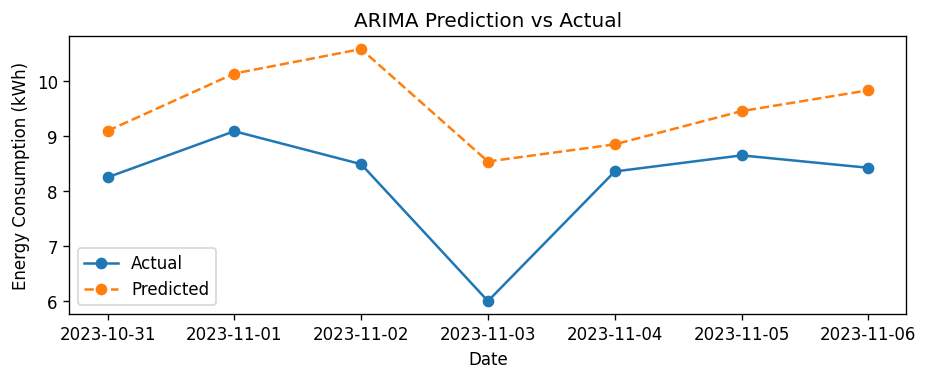

Root Mean Squared Error (RMSE): 0.9361123650502648
[ 0.2054  1.0454  0.4454 -2.0476  0.3124  0.6054  0.3794]


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Model ARIMA dari awal (scratch)
def arima_model(train, test, p, d, q):
    # Inisialisasi residual
    residuals = np.zeros(len(test))

    # Loop untuk setiap data uji
    for i in range(len(test)):
        # Pemrosesan data pelatihan dan uji
        train_data = train[:len(train) + i]
        test_data = test.iloc[i]  # Perbaikan di sini, menggunakan iloc untuk mengakses data DataFrame

        # Perhitungan rata-rata data pelatihan
        mean_train = np.mean(train_data)

        # Perhitungan residu
        residuals[i] = test_data - mean_train

    # Hitung RMSE
    rmse = np.sqrt(np.mean(residuals**2))

    return residuals, rmse

# Parameter model ARIMA
p = 1  # Orde Autoregressive
d = 1  # Derajat Integrasi
q = 1  # Orde Moving Average

# Prediksi menggunakan model ARIMA
residuals, rmse_result = arima_model(train, test, p, d, q)

# Visualisasi hasil prediksi
predicted_values = train.iloc[-1] + np.cumsum(residuals)
plt.plot(test.index, test.values, label='Actual', marker='o')
plt.plot(test.index, predicted_values, label='Predicted', linestyle='dashed', marker='o')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('ARIMA Prediction vs Actual')
plt.legend()
plt.show()

# RMSE
print(f'Root Mean Squared Error (RMSE): {rmse_result}')
# print(residuals)

c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


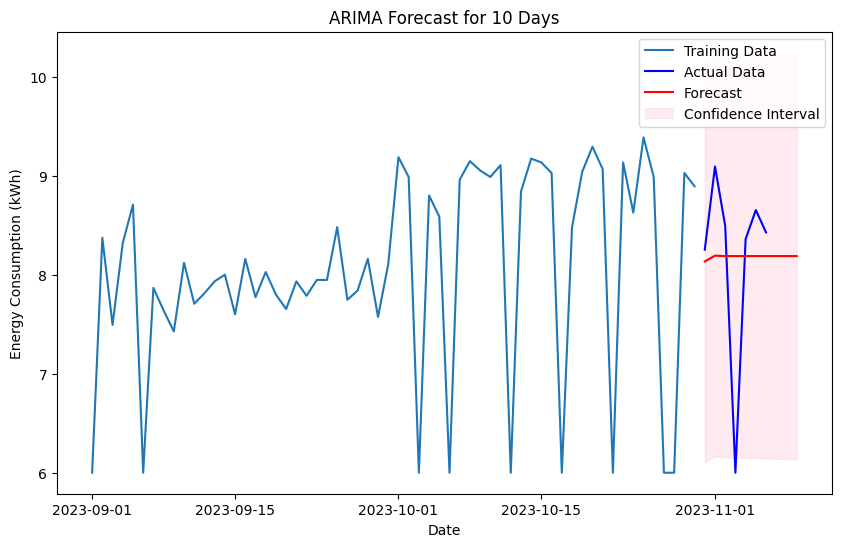

In [35]:
model = ARIMA(train, order=(1, 1, 1))

# Fit model ke data pelatihan
model_fit = model.fit()

# Lakukan prediksi untuk 10 hari ke depan
forecast_steps = 10
forecast = model_fit.get_forecast(steps=forecast_steps)

# Ambil nilai prediksi dan interval prediksi
forecast_values = forecast.predicted_mean
confidence_interval = forecast.conf_int()

# Tampilkan plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Training Data')
plt.plot(test.index, test.values, label='Actual Data', color='blue')
plt.plot(forecast_values.index, forecast_values.values, label='Forecast', color='red')
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Forecast for 10 Days')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()


c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Dates and Forecasted Values:
60: 8.133955897090813
61: 8.192472151362729
62: 8.187961014261615
63: 8.188308786999263
64: 8.188281976491327
65: 8.188284043367933
66: 8.188283884028209

Confidence Interval:
    lower Energy Consumption (kWh)  upper Energy Consumption (kWh)
60                        6.106098                       10.161814
61                        6.164331                       10.220613
62                        6.156003                       10.219919
63                        6.153255                       10.223363
64                        6.150084                       10.226480
65                        6.146951                       10.229617
66                        6.143820                       10.232747
67                        6.140695                       10.235873
68                        6.137574                       10.238994
69                        6.134458                       10.242110


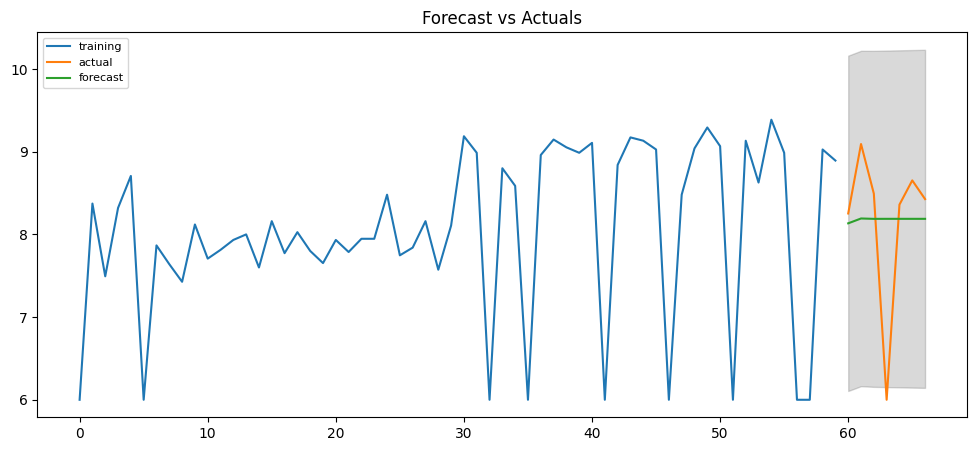

Root Mean Squared Error (RMSE): 0.926537287713009


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  

# Forecast
fc = fitted.forecast(steps=10, alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=test.index)

conf_int = fitted.get_forecast(steps=10, alpha=0.05).conf_int()
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)

print("Dates and Forecasted Values:")
for date, forecast in fc_series.items():
    print(f"{date}: {forecast}")

print("\nConfidence Interval:")
print(conf_int)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(test.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Hitung RMSE
squared_errors = (test.values - fc_series.values) ** 2
mean_squared_error = squared_errors.mean()
rmse = mean_squared_error**0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

In [16]:
import numpy as np
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc[:len(test.values)], test.values)

{'mape': 0.08809542926918977,
 'me': -0.001636035199730149,
 'mae': 0.6268671171995196,
 'mpe': 0.016109751064108484,
 'rmse': 0.926537287713009}

In [25]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm
df2 = pd.read_csv('daily_energy_consumption.csv', parse_dates=['Date'])
model = pm.auto_arima(df2['Energy Consumption (kWh)'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=206.299, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=472.858, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=247.281, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=397.793, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=207.976, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=207.318, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=362.510, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=196.810, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=197.145, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=197.382, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=196.349, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=195.068, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=196.777, Time

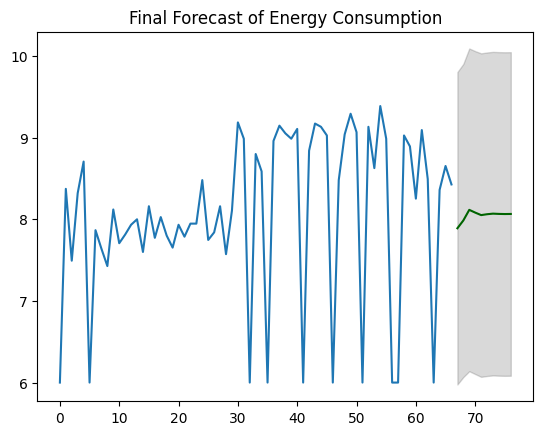

In [26]:
# Forecast
n_periods = 10
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df2['Energy Consumption (kWh)']), len(df2['Energy Consumption (kWh)'])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df['Energy Consumption (kWh)'])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Energy Consumption")
plt.show()

c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


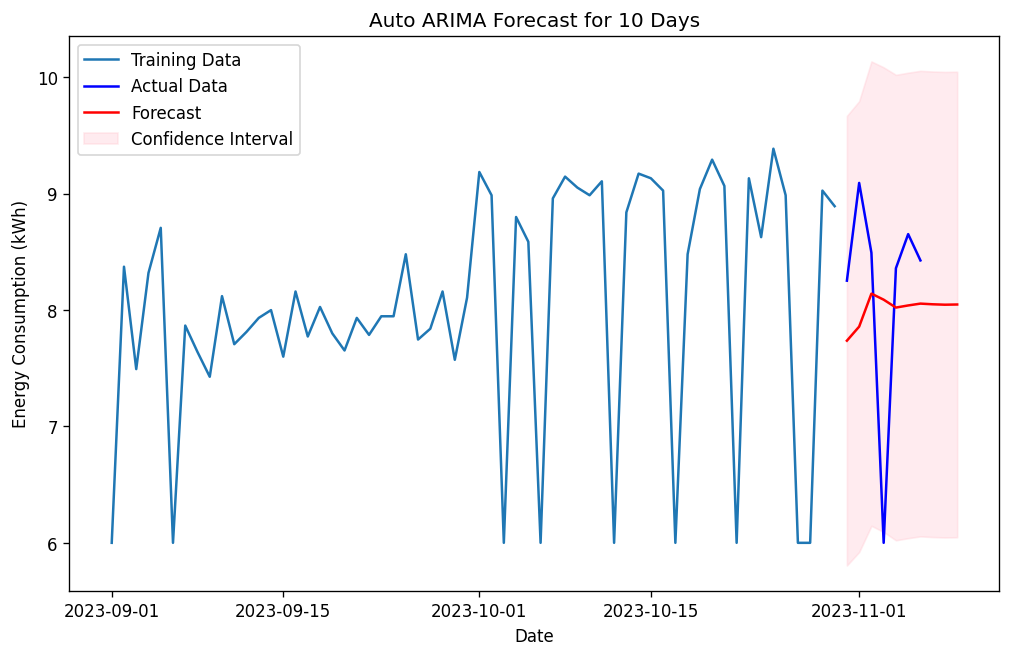

Root Mean Squared Error (RMSE): 0.9934599015241888


In [32]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Model ARIMA
model = ARIMA(train, order=(2, 0, 0))

# Fit model ke data pelatihan
model_fit = model.fit()

# Lakukan prediksi untuk 10 hari ke depan
forecast_steps = 10
forecast = model_fit.get_forecast(steps=forecast_steps)

# Ambil nilai prediksi dan interval prediksi
forecast_values = forecast.predicted_mean
confidence_interval = forecast.conf_int()

# Tampilkan plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Training Data')
plt.plot(test.index, test.values, label='Actual Data', color='blue')
plt.plot(forecast_values.index, forecast_values.values, label='Forecast', color='red')
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Auto ARIMA Forecast for 10 Days')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()

# Hitung RMSE tanpa menggunakan library
squared_errors = (test.values - forecast_values.values[:len(test)]) ** 2
mean_squared_error = np.mean(squared_errors)
rmse = np.sqrt(mean_squared_error)

# Tampilkan RMSE
print(f'Root Mean Squared Error (RMSE): {rmse}')